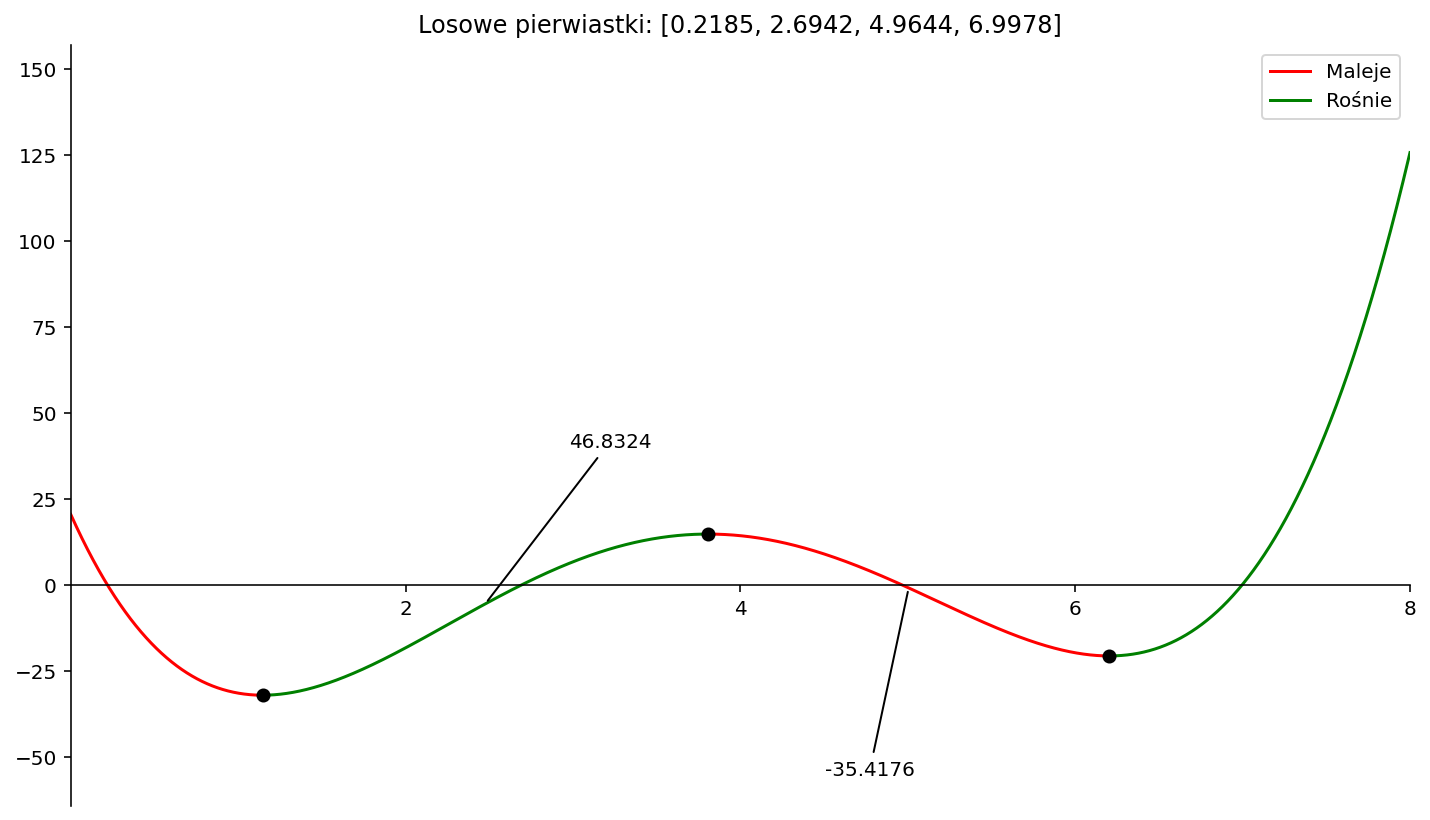

In [7]:
import random
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy

def setcolor(x):
    if x < 0:
        return ('red')
    else:
        return('green')

roots = []
rootsRounded = []
for i in range(4):
    roots.append(random.uniform(2*i, 2+2*i))
    rootsRounded.append(round(roots[i],4))

fig = plt.figure()
ax = fig.add_subplot()

xleft = 0
xright = 8

#Obliczenie ekstremów lokalnych
N = 100000
x = np.linspace(xleft,xright,N+1)
y = ((x - roots[0])*(x - roots[1])*(x - roots[2])*(x - roots[3]))
dydx = np.gradient(x, y)
xExtreme = x[1:][dydx[1:]*dydx[:-1]<0]
yExtreme = y[1:][dydx[1:]*dydx[:-1]<0]

#Ustalenie granic osi OY
yleft = (xleft - roots[0]) * (xleft - roots[1]) * (xleft - roots[2]) * (xleft - roots[3])
yright = (xright - roots[0]) * (xright - roots[1]) * (xright - roots[2]) * (xright - roots[3])

#Przygotowanie wykresu
ax.scatter([xExtreme], [yExtreme], color = 'black', marker = 'o', zorder = 66)
ax.set_xticks([2,4,6,8])
ax.set_xlim(xleft,xright)
ax.set_ylim(2 * min(yExtreme),1.25 * max(yleft,yright))
ax.set_title('Losowe pierwiastki: '+ str(rootsRounded))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))

#Określenie monotoniczności
xd0 = round(yExtreme[0] - yleft, 4)
xd1 = round(yExtreme[1] - yExtreme[0], 4)
xd2 = round(yExtreme[2] - yExtreme[1], 4)
xd3 = round(yright - yExtreme[2], 4)

# Monotoniczność na wykresie
x1 = np.linspace(0,xExtreme[0],N+1)
y1 = ((x1 - roots[0])*(x1- roots[1])*(x1 - roots[2])*(x1 - roots[3]))
ax.plot(x1,y1, color = setcolor(xd0), label = 'Maleje')
x2 = np.linspace(xExtreme[0],xExtreme[1],N+1)
y2 = ((x2 - roots[0])*(x2- roots[1])*(x2 - roots[2])*(x2 - roots[3]))
ax.plot(x2,y2, color = setcolor(xd1), label = 'Rośnie')
x3 = np.linspace(xExtreme[1],xExtreme[2],N+1)
y3 = ((x3 - roots[0])*(x3- roots[1])*(x3- roots[2])*(x3 - roots[3]))
ax.plot(x3,y3, color = setcolor(xd2))
x4 = np.linspace(xExtreme[2],8,N+1)
y4 = ((x4 - roots[0])*(x4- roots[1])*(x4 - roots[2])*(x4 - roots[3]))
ax.plot(x4,y4, color = setcolor(xd3))
leg = ax.legend();

# Zaznaczenie o ile zmieniła się wartość funkcji + przeniesienie tego na wykres
xa1 = (xExtreme[1]+xExtreme[0])/2
ya1 = ((xa1 - roots[0])*(xa1 - roots[1])*(xa1 - roots[2])*(xa1 - roots[3]))
ax.annotate(xd1,xy = (xa1,ya1), xytext=(xa1+0.5,ya1+50),size=10, arrowprops=dict(arrowstyle='-', facecolor = 'gray'), horizontalalignment = 'left', verticalalignment = 'top')

xa2 = (xExtreme[1] + xExtreme[2])/2
ya2 = ((xa2 - roots[0])*(xa2 - roots[1])*(xa2 - roots[2])*(xa2 - roots[3]))
ax.annotate(xd2,xy = (xa2,ya2), xytext=(xa2-0.5,ya2-50),size=10, arrowprops=dict(arrowstyle='-', facecolor = 'gray'), horizontalalignment = 'left', verticalalignment = 'top')
plt.savefig('02_lew_275116.pdf')